# Liberty_AI

## -- Setting up -----------------------------------------------------------------------------------------------

### Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
predata = pd.read_csv('N_data.txt', header = None)
predata.to_csv('dataframe.csv')

,0,1,2
0,NaN,0.0000,1.0
1,0.0,236.7688,NaN
2,1.0,236.8024,NaN
3,2.0,236.7914,NaN
4,3.0,236.7894,NaN
...,...,...,...
997,996.0,237.0231,NaN
998,997.0,237.0265,NaN
999,998.0,237.0421,NaN
1000,999.0,237.0013,NaN


## -- Data Preprocessing ------------------------------------------------------------------------------------

### Get data

In [160]:
df = pd.read_csv('dataframe.csv', header = None) # Read the datafram file
df.columns = ['Index_drop_1','price','Index_drop_2'] # Rename the columns
df = df.drop('Index_drop_1', 1) # Drop the unuseless column
df = df.drop('Index_drop_2', 1) # Drop the unuseless column
df = df.drop(0, 0) # # Drop the unuseless row

print(df.head())

      price
1  236.7688
2  236.8024
3  236.7914
4  236.7894
5  236.8027


### Adding tick column

In [162]:
tick = []
for i in range(1001):
    tick.append(i)

df['tick'] = tick
df

,price,tick
1,236.7688,0
2,236.8024,1
3,236.7914,2
4,236.7894,3
5,236.8027,4
...,...,...
997,237.0231,996
998,237.0265,997
999,237.0421,998
1000,237.0013,999


### Showing data

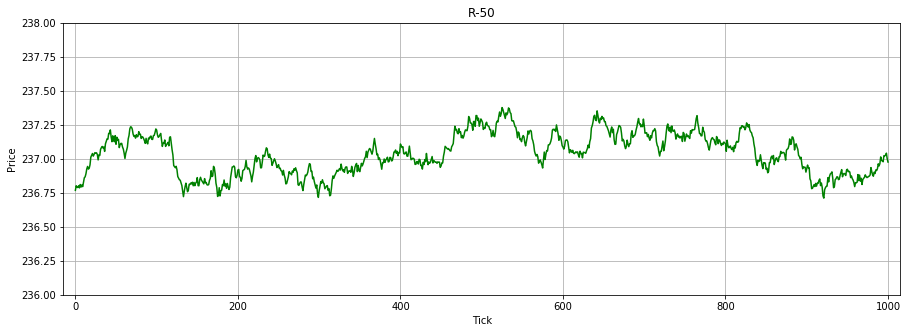

In [163]:
plt.figure(figsize=(15, 5)) # Setting the graph size
plt.plot(df.tick, df.price, linewidth=1.5, color = 'green') # Taking graph data
plt.grid(True) # Adding grid
# Setting up axis
plt.title('R-50')
plt.xlabel('Tick')
plt.ylabel('Price')
plt.axis([-15, 1015, 236, 238])
plt.show()

### Adding categorical variables: Even Odd

In [164]:
EO = []
# Categoring data based on dataframe
for index, row in df.iterrows():
    #print(row['price'])
    aux = row['price']*10000
    if (aux%2) == 0:
        EO.append('even')
    else:
        EO.append('odd')

# Adding data to df
df['parity'] = EO
df.head()

,price,tick,parity
1,236.7688,0,even
2,236.8024,1,even
3,236.7914,2,even
4,236.7894,3,even
5,236.8027,4,odd


### Adding categorical variables: Call Put

In [159]:
# Not yet
'''
ctt = []
aux_ = []
for index, row in df.iterrows():
    aux_.append(row['price'])

    
for i in range(len(aux_)):
    if (i == 0):
        ctt.append('NaN')
    else:
        if(aux_[i] > aux_[i - 1]):
            ctt.append('call')
        else:
            ctt.append('put')
    

# Adding data to df
df['call/put'] = ctt
#df = df.drop(1, 0) # Drop the unuseless row
df'''

,price,tick,parity,call/put
2,236.8024,1,even,NaN
3,236.7914,2,even,put
4,236.7894,3,even,put
5,236.8027,4,odd,call
6,236.7870,5,even,put
...,...,...,...,...
997,237.0231,996,odd,put
998,237.0265,997,odd,call
999,237.0421,998,odd,call
1000,237.0013,999,odd,put


### Creating the dependent and independent matrix

In [165]:
# Create the INDEPENDENT variables matrix
X = df.iloc[:, :-1].values

# Create the DEPENDENT variables matrix
y = df.iloc[:, -1].values

### Encoding categorical variables

In [167]:
from sklearn.preprocessing import LabelEncoder

# Create the class encoder
labelencoder_y = LabelEncoder()

# add to y matrix column encoded
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Splitting the dataset into the Training set and Test set

In [169]:
from sklearn.model_selection import train_test_split

# Setting the Training size and test size sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

### Feature Scaling

In [172]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
X_train

array([[ 0.3609886 ,  0.7589427 ],
       [ 0.63137948,  0.84480955],
       [-0.37772197,  1.23979704],
       ...,
       [ 0.53543433, -1.36025105],
       [-0.78498566,  1.6519579 ],
       [-0.0643906 ,  1.69317399]])